In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

# 1. Mengimport Dataset

Dataset yang di import adalah dataset titanic untuk keperluan mempelajari data preparation dari machine learning

In [33]:
df = pd.read_csv(r'D:\shift academy\Materi\30\data_titanic.csv')

In [34]:
df.shape

(891, 12)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Preparation
Dilakukan untuk menghitung missing value dan data terduplikasi

## 2.1 Menghitung data terduplikasi

In [36]:
df.duplicated().any()

False

## 2.2 Tidak terdapat data terduplikasi, lalu dilakukan pengecekan Missing value

In [37]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
round(df.isna().sum()/len(df)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## 2.3 Menghapus kolom Cabin
Dikarenakan jumlah missing valuenya sebesar 77% atau melebihi 2/3 data

In [39]:
df.drop(columns='Cabin', inplace=True)

In [40]:
df.shape

(891, 11)

## 2.4 Mengisi kolom umur yang kosong dengan Median
Dikarenakan kolom data umur tidak berdistribusi normal, maka pengisian missing value dilakukan dengan dengan median

In [41]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [42]:
df.describe()[['Age']]

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [43]:
df['Age'].mean()

29.69911764705882

In [44]:
df['Age'].median()

28.0

In [45]:
df['Age'].quantile(0.50)

28.0

<AxesSubplot:xlabel='Age'>

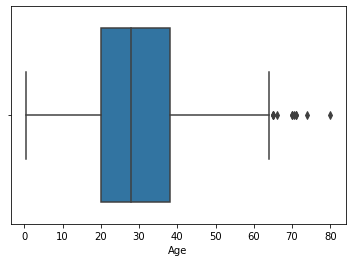

In [46]:
sns.boxplot(df['Age'])

## 2.5 Uji Normalitas dan pengisian Missing Value Age
Uji Normalitas dilakukan untuk mengetahui apakah data berdistibusi normal atau tidak

In [47]:
stat, p = st.jarque_bera(df['Age'])
if p>0.05:
    print('terima Ho, data berdistribusi normal')
else:
    print('tolak Ho, data tidak berdistribusi normal')

tolak Ho, data tidak berdistribusi normal


In [48]:
df['Age'].fillna(df['Age'].quantile(0.50), inplace = True)

In [49]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

## 2.6 Pengisian Missing value kolom Embarkasi

<AxesSubplot:xlabel='Embarked', ylabel='count'>

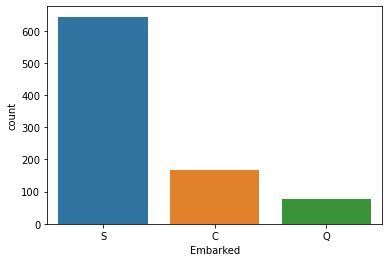

In [50]:
sns.countplot(df['Embarked'])

In [51]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

# 3. Mengetahui data penumpang yang selamat
- o menunjukkan bahwa penumpang kapal titanic wafat saat perjalanan kapal titanic
- 1 menunjukkan bahwa penumpang kapal titanic selamat saat perjalanan kapal titanic

In [53]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

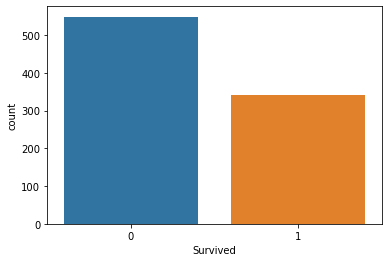

In [54]:
sns.countplot(df['Survived'])

## 3.1 Persentase persebaran penumpang titanic yang selamat dan tidak di setiap umurnya

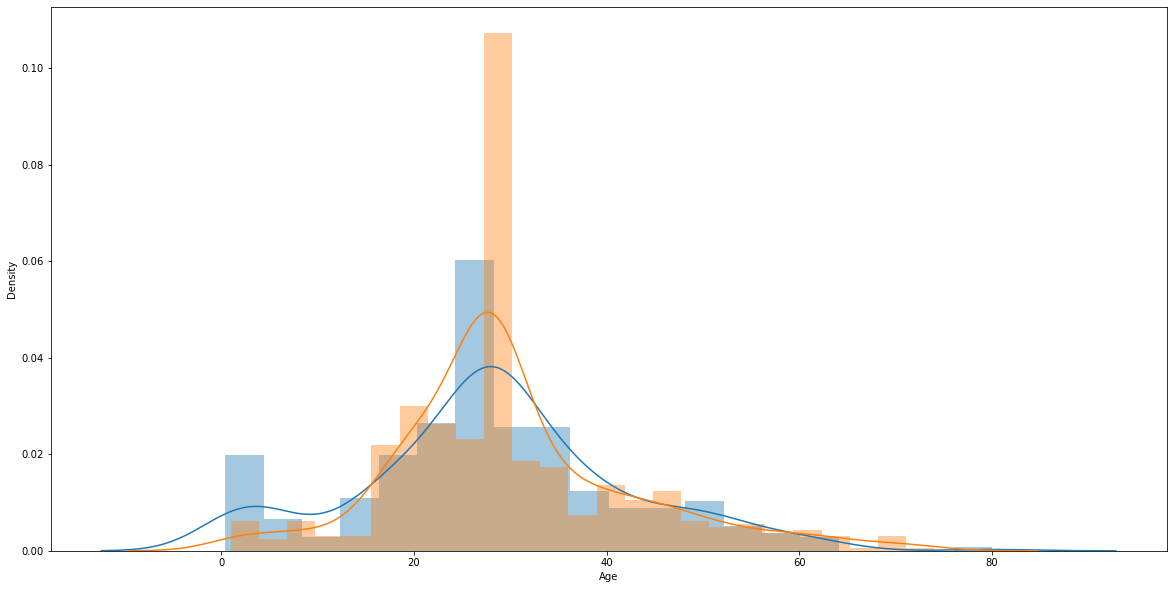

In [55]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==1]['Age'], label='Selamat')
sns.distplot(df[df['Survived']==0]['Age'], label='Tidak Selamat')
plt.show()

## 3.2 Pesebaran penumpang selamat di setiap kelas tiketnya

In [56]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

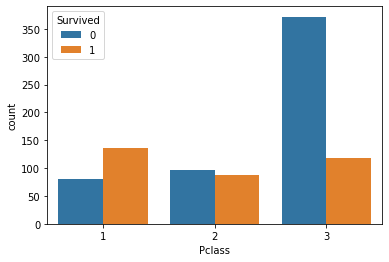

In [57]:
sns.countplot(df['Pclass'], hue = df['Survived'])

## 3.3 Mengetahui pesebaran penumpang selamat di setiap gendernya

<AxesSubplot:xlabel='Sex', ylabel='count'>

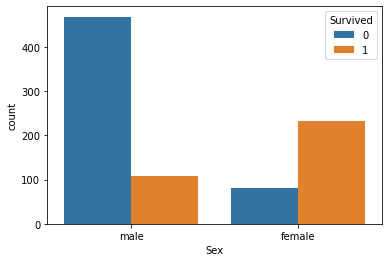

In [58]:
sns.countplot(df['Sex'], hue=df['Survived'])

## 3.4 Mengetahui pesebaran penumpang selamat di setiap embarkasinya
Embarkasi adalah titik keberangkatannya

<AxesSubplot:xlabel='Embarked', ylabel='count'>

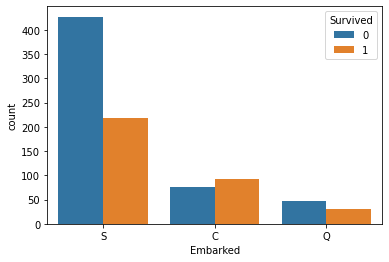

In [59]:
sns.countplot(df['Embarked'], hue=df['Survived'])

# 4. Data Preprocessing For Machine Learning
Dilakukan untuk mempersiapkan data agar dapat diolah dalam proses machine learning

## 4.1 Menghapus kolom yang tidak dibutuhkan dalam machine learning

In [60]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True) #Karena kolom tersebut tidak dibutuhkan

In [61]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 4.2 Melakukan Encoding pada kolom sex

In [65]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
LE = LabelEncoder()

In [68]:
df['Sex'] = LE.fit_transform(df['Sex'])

In [69]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


## 4.3 Melakukan encoding pada kolom Embarkasi

In [71]:
df = pd.get_dummies(data=df, columns=['Embarked'])

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


## 4.4 Melakukan penyekalaan pada kolom Fare dan Age

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
df['Fare'] = MinMaxScaler().fit_transform(np.array(df['Fare']).reshape(-1,1))

In [75]:
df['Age'] = MinMaxScaler().fit_transform(np.array(df['Age']).reshape(-1,1))

In [76]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.271174,1,0,0.014151,0,0,1
1,1,1,0,0.472229,1,0,0.139136,1,0,0
2,1,3,0,0.321438,0,0,0.015469,0,0,1
3,1,1,0,0.434531,1,0,0.103644,0,0,1
4,0,3,1,0.434531,0,0,0.015713,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,0,0,1
887,1,1,0,0.233476,0,0,0.058556,0,0,1
888,0,3,0,0.346569,1,2,0.045771,0,0,1
889,1,1,1,0.321438,0,0,0.058556,1,0,0


# 5. Melakukan Train Test Split

In [78]:
x = df.drop('Survived', axis=1) #feature, independent variabel
y = df['Survived'] #dependent variabel

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 40)

In [82]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
661,3,1,0.497361,0,0,0.014102,1,0,0
393,1,0,0.283740,1,0,0.221098,1,0,0
266,3,1,0.195778,4,1,0.077465,0,0,1
144,2,1,0.220910,0,0,0.022447,0,0,1
446,2,0,0.158080,0,1,0.038061,0,0,1
...,...,...,...,...,...,...,...,...,...
440,2,0,0.560191,1,1,0.051237,0,0,1
165,3,1,0.107816,0,2,0.040062,0,0,1
7,3,1,0.019854,3,1,0.041136,0,0,1
219,2,1,0.371701,0,0,0.020495,0,0,1


In [86]:
x_train.shape

(712, 9)

In [83]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
246,3,0,0.308872,0,0,0.015176,0,0,1
588,3,1,0.271174,0,0,0.015713,0,0,1
472,2,0,0.409399,1,2,0.054164,0,0,1
71,3,0,0.195778,5,2,0.091543,0,0,1
654,3,0,0.220910,0,0,0.013175,0,1,0
...,...,...,...,...,...,...,...,...,...
284,1,1,0.346569,0,0,0.050749,0,0,1
727,3,0,0.346569,0,0,0.015103,0,1,0
599,1,1,0.610455,1,0,0.111118,1,0,0
525,3,1,0.503644,0,0,0.015127,0,1,0


In [87]:
x_test.shape

(179, 9)

In [88]:
y_train

661    0
393    1
266    0
144    0
446    1
      ..
440    1
165    1
7      0
219    0
326    0
Name: Survived, Length: 712, dtype: int64

In [89]:
y_train.shape

(712,)

In [90]:
y_test


246    0
588    0
472    1
71     0
654    0
      ..
284    0
727    1
599    1
525    0
457    1
Name: Survived, Length: 179, dtype: int64

In [91]:
y_test.shape

(179,)